# Проект продажи игр и их оценки в разных регионах.

**Цель исследования — выявить определяющие успешности игр закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.\
\
Ход исследования - В проекте используются данные  из открытых источников о продажах игр, оценок пользователей и экспертов, разные жанры и платформы.\
Данные подвергнутся проверки на ошибки, пропуски а также для удобства расчётов будут изменены типы данных.\
Будет выяснена история продаж игр по разным платформам.\
С помощью диаграмм будет выявлен портрет пользователей.\
А также мы ответим на вопросы:\
Что можно сказать о самых прибыльных жанрах?\
Выделяются ли жанры с высокими и низкими продажами?\
Влияет ли рейтинг ESRB на продажи в отдельном регионе?\
\
Опишем самые популярные платформы (топ-5).\
Самые популярные жанры (топ-5).\
\
А в конце исследования с помощью t-теста проверим гипотезы утверждающие:\
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.\
Средние пользовательские рейтинги жанров Action и Sports разные.\**

## Загрузка и первое знакомство с данными.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [2]:
pd.set_option('display.max_rows', None)

### Загрузка

In [3]:
data = pd.read_csv('/datasets/games.csv')

### Знакомство

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [6]:
data['Platform'].unique() # Смотрим уникальные значения некоторых столбцов.

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

**Много разных платформ**

In [7]:
sorted(data['Year_of_Release'].unique())

[1980.0,
 1981.0,
 1982.0,
 1983.0,
 1984.0,
 1985.0,
 1986.0,
 1987.0,
 1988.0,
 1989.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0,
 nan]

**Данные c 80 года по 16.**

In [8]:
data['Critic_Score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

**Оценки всегда натуральное число**

In [9]:
data['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

**Далее допольнительно выясним что это за рейтинги.**

In [10]:
data['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [11]:
data['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [12]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

**Основная масса пропусков в рейтингах, два в названиях и два в жанрах.**

In [13]:
data[data['Year_of_Release'].isna()].head(100) # Посмотрел что за пропуски.

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


**Довольно часто встречаются наименования игр с указанием года. Можно написать цикл который будет брать эти цифры и вставлять в ячейку Year_of_Release, делать этого мы конечно же не будем.**

In [14]:
data[data['Name'].isna()] # Мало того что пропуск, так ещё и дубликат.

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [15]:
data[data['Genre'].isna()] # Они же в жанрах.

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


### Количество игр по рейтингу

In [16]:
data.groupby('Rating')['Rating'].count()

Rating
AO         1
E       3990
E10+    1420
EC         8
K-A        3
M       1563
RP         3
T       2961
Name: Rating, dtype: int64

**Интересуют редкие рейтинги**

**K-A - Kids to Adults тоже самое что E10+**\
**RP - ожидает оценки, тоже самое что NA**\
**AO - это наивысший из рейтингов контента ESRB**\
**EС - Early childhood - Для детей младшего возраста**

### Количество игр по платформам.

In [17]:
data.groupby('Platform')['Platform'].count()

Platform
2600     133
3DO        3
3DS      520
DC        52
DS      2151
GB        98
GBA      822
GC       556
GEN       29
GG         1
N64      319
NES       98
NG        12
PC       974
PCFX       1
PS      1197
PS2     2161
PS3     1331
PS4      392
PSP     1209
PSV      430
SAT      173
SCD        6
SNES     239
TG16       2
WS         6
Wii     1320
WiiU     147
X360    1262
XB       824
XOne     247
Name: Platform, dtype: int64

**Несколько платформ с малым количеством игр**

### **Вывод**

**Необходимо изменить типы данных следующих столбцов: \
Year_of_release - с float на int \
User_Score - с object на float** \
\
**Также значения Critic_Score которые являются натуральным числом, разделим на 10, для приведения оценок к единым показателям.**

**Пропуски в следующих столбцах: \
Name - 2 пропуска, удалим.\
Year_of_Release - 269 строк. Поменяю nan на 0, и изменю тип данных на int \
Genre - 2 пропуска, 1.78 миллиона продаж на платформе GEN в 1993 году это Mortal Kombat II. Не буду тратить время, удалю эти строки.\
Critic_Score - 8578 пропусков.\
User_Score - 6701 пропусков.\
Rating - 6766 пропусков.\
\
В столбце User_Score присутствует некое обозначение 'tbd', далее выясним что это.
Первый же поиск выдал такой результат: \
TBD расшифровывается как To Be Disclosed/Defined/Decided, что означает «будет определено/разъяснено/решено». В контексте рейтинга, TBD обычно относится к компаниям, для которых информация о финансовом состоянии или производственных показателях пока неизвестна или не определена. \
Соответственно 'tbd будем считать за NaN\
\
Столбец Rating имеет значения K-A которые являются тем же самым что и E10+, объеденим.**\
**RP - ожидает оценки, исправим на nan**

## Предобработка данных.

### Изменение названий столбцов.

In [18]:
data.columns = map(str.lower, data.columns) # Приведение к нижнему регистру.
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Проверка на дубликаты.

In [19]:
len(data)-len(data.drop_duplicates()) # Количество дубликатов.

0

In [20]:
data[data.duplicated(['name', 'platform'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.0,0.48,0.00,0.00,43.0,4.1,E10+
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E


### Изменение типа данных.

#### Подготовка к изменению типа данных столбца user_score

In [21]:
print(data[data['user_score'] == 'tbd'].count()) # Провожу дополнительные проверки.
data['user_score'].isna().sum()

name               2424
platform           2424
year_of_release    2376
genre              2424
na_sales           2424
eu_sales           2424
jp_sales           2424
other_sales        2424
critic_score       1082
user_score         2424
rating             2374
dtype: int64


6701

**2424 значений 'tbd'**

In [22]:
data['user_score'] = data['user_score'].replace(r'tbd', np.nan, regex=True) # Меняем значение 'tbd' на NaN
data[data['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [23]:
data['user_score'].isna().sum() # Так как в первые пользуюсь таким методом делаю двойную проверку.

9125

In [24]:
9125 - 6701

2424

**Значений nan стало на 2424 больше, всё в порядке.**

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Подготовка к изменению типа данных столбца year_of_release

In [26]:
data['year_of_release'].fillna(0, inplace=True) # Меня nan на ноль.

#### Изменение типа данных.

In [27]:
data['year_of_release'] = data['year_of_release'].astype(int) # Теперь меняю тип данных.
data['user_score'] = data['user_score'].astype(float)
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


#### Столбец raiting и значения K-A.

In [29]:
data[data['rating'] == 'K-A']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
656,Theme Hospital,PC,1997,Strategy,2.30,0.10,0.00,0.00,NaN,9.0,K-A
903,PaRappa The Rapper,PS,1996,Misc,0.26,0.16,1.46,0.03,92.0,7.4,K-A
16681,Worms 2,PC,1997,Strategy,0.00,0.01,0.00,0.00,NaN,8.1,K-A


Worms и Theme hospital.. пасхалка)

In [30]:
data.loc[(data['rating'] == 'K-A'), 'rating'] = 'E10+' # Меняю значения K-A на E10+. Так как это тоже самое.

In [31]:
data['rating'] = data['rating'].replace(r'RP', np.nan, regex=True) # Меняем значение RP на nan.
data['rating'] = data['rating'].fillna('unknown')

In [32]:
data['rating'].isna().count()

16715

In [33]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown


#### Корректировка рейтинга critic_score

In [34]:
data['critic_score'] = data['critic_score'] / 10

### Пропуски

#### Пропуски в name и genre.

In [35]:
data = data[data['name'].isna() == False] # Так-как это одни и теже строки досточно удалить их в одном столбце.
data['name'].isna().sum()

0

In [36]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating                0
dtype: int64

**Обработайте пропуски при необходимости:
Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
Опишите причины, которые могли привести к пропускам;
Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать**

**Не стал ни удалять ни заполнять пропуски в critic_score, user_score, raiting, так-как мы всё таки имеем некоторые данные по этим строкам, медианные же значения могут сильно исказить вычисления, также рассматривал возможность восстановить данные по закону распределения, но опять же неизвестно на сколько это исказит данные.\
В общем оставшихся данных считаю достаточно хорошой выборкой для дальнейших вычислений, но так-как где-то нет оценок а где-то рейтинга, данные оставляем и будем оперировать ими через срезы.**\
\
**Причинами пропусков могут быть как человеческий фактор, так и то что оценок либо нет, либо ещё не поставили, также с rating возможно что его нет так-как некогда они и не требовались от издателя.**\
\
**TBD расшифровывается как To Be Disclosed/Defined/Decided, что означает «будет определено/разъяснено/решено». В контексте рейтинга, TBD обычно относится к компаниям, для которых информация о финансовом состоянии или производственных показателях пока неизвестна или не определена.**

### Добавление столбца с суммарной продажей.

In [37]:
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [38]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,7.6,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,8.2,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,8.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


### Аномальные значения

array([[<AxesSubplot:title={'center':'year_of_release'}>,
        <AxesSubplot:title={'center':'na_sales'}>,
        <AxesSubplot:title={'center':'eu_sales'}>],
       [<AxesSubplot:title={'center':'jp_sales'}>,
        <AxesSubplot:title={'center':'other_sales'}>,
        <AxesSubplot:title={'center':'critic_score'}>],
       [<AxesSubplot:title={'center':'user_score'}>,
        <AxesSubplot:title={'center':'sum_sales'}>, <AxesSubplot:>]],
      dtype=object)

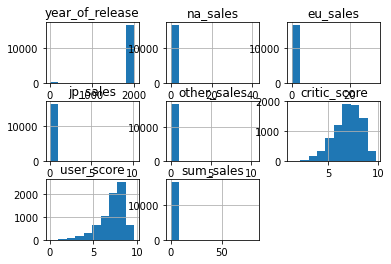

In [39]:
data.hist()

In [40]:
data[data['na_sales'] > 10]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,7.6,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,8.2,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,8.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,8.9,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,5.8,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,8.7,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown,28.31


In [41]:
data[data['eu_sales'] > 5]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,7.6,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,8.2,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,8.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,8.9,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,5.8,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,8.7,8.4,E,28.32
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,unknown,24.67
11,Mario Kart DS,DS,2005,Racing,9.71,7.47,4.13,1.90,9.1,8.6,E,23.21
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,unknown,23.09


**Значения в порядке**

### Вывод

**Изменили названия стоблцов на нижний регистр.**\
**Проверили на дубликаты, их не оказалось.**\
**Изменили тип данных столбцов year_of_release и user_score.**\
**В столбце rating поменяли значение K-A на E10+, а значению RP присвоили nan.**\
**Значения critic_score привели к общему виду оценок.**\
**Сохранили строки с пропусками в rating, critic_score, user_score.** \
**Аномальные значения не обнаружены.**

## Исследовательский анализ данных.

### Количество игр выпущенных в разные годы.

In [43]:
data_year.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,7.6,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,8.2,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,8.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


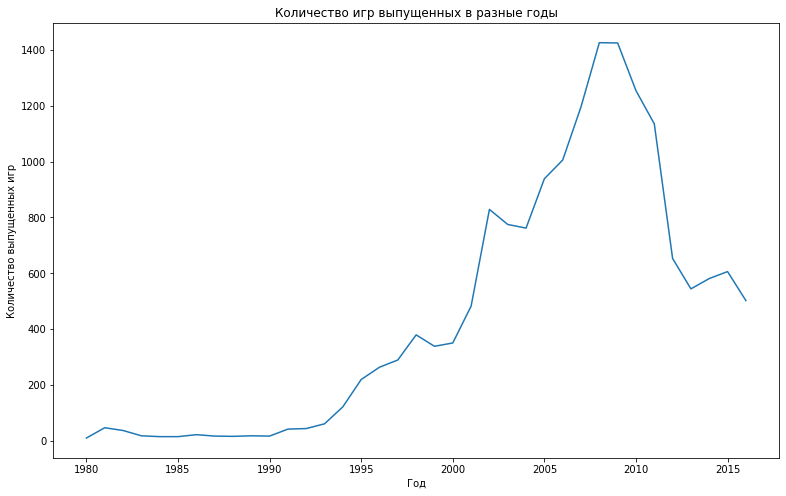

In [78]:
#Код ревьюера
datapl = data[data['year_of_release'] > 1]
platform_sales = datapl.pivot_table(index='year_of_release', values='sum_sales', aggfunc='count')
plt.figure(figsize=(13, 8))
(sns.lineplot(data = platform_sales, x = platform_sales.index, y = 'sum_sales')
    .set(title = 'Количество игр выпущенных в разные годы', xlabel = 'Год', ylabel = 'Количество выпущенных игр'))
plt.show()

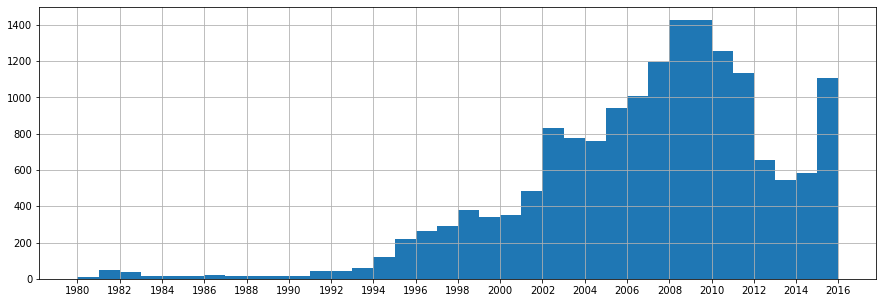

In [45]:
year_hist = data[data['year_of_release'] > 1]
year_hist = year_hist['year_of_release'].hist(figsize=(15,5), bins=36)
year_hist.set_xticks(np.arange(1980,2017,2))
print()

**Важны ли данные за весь период?**\
**Конечно важны, но выбранный период зависит от того какие вопросы надо будет разбирать, к примеру если нам надо будет выяснить что-нибудь про шутеры то до 90х смысла особого от данных не будет. А если нас заинтересуют игры 80х? Space Invaders к примеру.\
В общем не вижу смысла избавляться от данных тем более в таком большом количестве, срезы позволят оперировать бОльшим количеством данных чем если мы очистим датафрейм от неопределенных данных, так-как могут встречаться строки где нет оценок пользователей но присутствуют оценки критиков, и так далее.**

### Платформы с наибольшим количеством продаж по годам.

In [46]:
sales = data.groupby(['platform'])['sum_sales'].sum() # Берём суммы продаж в зависимости от платформы.
sales = sales[sales > 40]                             # Указываем количество млн продаж платформеров.
sales

platform
2600      96.98
3DS      259.00
DS       806.12
GB       255.46
GBA      317.85
GC       198.93
N64      218.68
NES      251.05
PC       259.52
PS       730.86
PS2     1255.77
PS3      939.65
PS4      314.14
PSP      294.05
PSV       54.07
SNES     200.04
Wii      907.51
WiiU      82.19
X360     971.42
XB       257.74
XOne     159.32
Name: sum_sales, dtype: float64

In [47]:
musthave = []      # Создаю список с платформами.                              
for i in sales.index:
    if i not in musthave:
        musthave.append(i)

In [48]:
data2 = data.loc[data['platform'].isin(musthave)] # Делаю срез по платформам относительно списка.
data2 = data2[data2['year_of_release'] > 1]

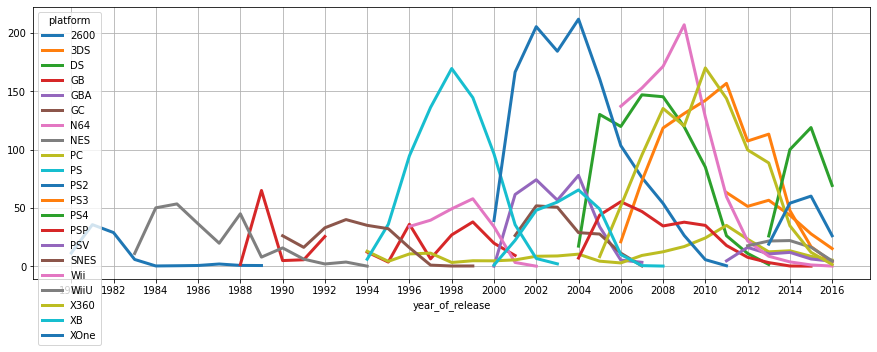

In [49]:
plot = data2.pivot_table(index='year_of_release', columns = 'platform', values='sum_sales', # Рисуем график.
                  aggfunc='sum').plot(grid=True, figsize=(15, 5), linewidth=3)
plot.set_xticks(np.arange(1980,2017,2))    
plt.show()

**Думаю тут без лишних слов всё понятно, идём к следующему заданию.**

**Шучу, не идём.** \
**Будем рассматривать именитые серии платформ в отдельности.**

#### Sony Playstation

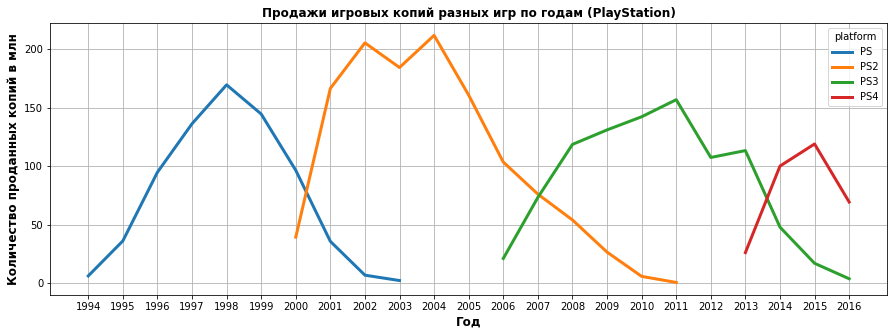

In [50]:
ps = ['PS', 'PS2', 'PS3', 'PS4']               # Создаю список фильтр.
data3 = data2[data['platform'].isin(ps)]       # Срез относительно фильтра.
plot = data3.pivot_table(index='year_of_release', columns = 'platform', values='sum_sales', 
                  aggfunc='sum').plot(grid=True, figsize=(15, 5), linewidth=3) # График через pivot_table.

plot.set_xlabel('Год', fontsize='12', fontweight='bold')                                # Наводим красоту.
plot.set_ylabel('Количество проданных копий в млн', fontsize='12', fontweight='bold')
plot.set_title('Продажи игровых копий разных игр по годам (PlayStation)', fontsize='12', fontweight='bold')
plot.set_xticks(np.arange(1994,2017,1))
# Все последующие графики построены путём копирования и вставки этого кода с небольшими корректировками.
plt.show()

**На графике видно что как только популярность платформы сильно спадает на свет появляется следующая серия.**\
**Популярностью PS пользуются примерно 4-5 лет.**\
**На графике видна тенденция популярности платформы, где пиковая популярность приходится на 00-05 годы, далее наблюдаем спад, на PS4 можно заметить не свойственные предыдущим годам показатели, вероятно наблюдаем захват рынка мобильными играми.**

#### XBOX

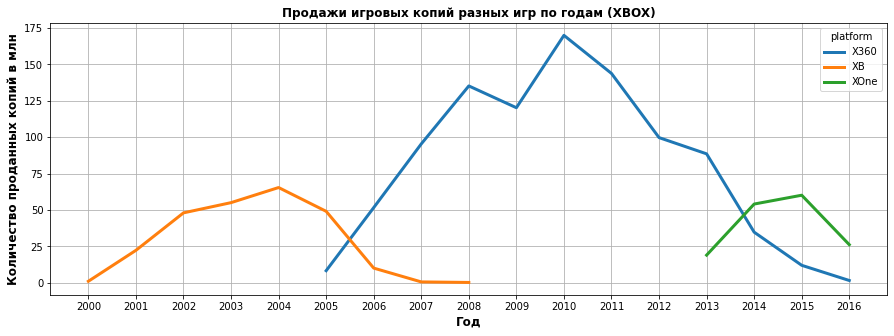

In [51]:
ps = ['XB', 'X360', 'XOne']
data4 = data2[data['platform'].isin(ps)]
plot = data4.pivot_table(index='year_of_release', columns = 'platform', values='sum_sales', 
                  aggfunc='sum').plot(grid=True, figsize=(15, 5), linewidth=3)

plot.set_xlabel('Год', fontsize='12', fontweight='bold')
plot.set_ylabel('Количество проданных копий в млн', fontsize='12', fontweight='bold')
plot.set_title('Продажи игровых копий разных игр по годам (XBOX)', fontsize='12', fontweight='bold')
plot.set_xticks(np.arange(2000,2017,1))

plt.show()

**XBOX обратно коррелирует с PlayStation, там где пик популярности XBOX там минимум PlayStation и наоборот, опять же 14-16 год резкое снижение популярности платформ.**

#### Nintendo

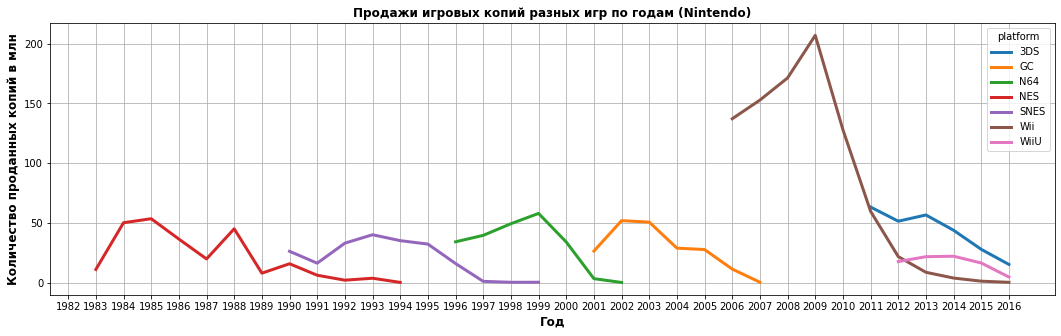

In [52]:
ps = ['N64', 'NES', 'SNES', 'Wii', '3DS', 'WiiU', 'GC']
data5 = data2[data['platform'].isin(ps)]
plot = data5.pivot_table(index='year_of_release', columns = 'platform', values='sum_sales', 
                  aggfunc='sum').plot(grid=True, figsize=(18, 5), linewidth=3)

plot.set_xlabel('Год', fontsize='12', fontweight='bold')
plot.set_ylabel('Количество проданных копий в млн', fontsize='12', fontweight='bold')
plot.set_title('Продажи игровых копий разных игр по годам (Nintendo)', fontsize='12', fontweight='bold')
plot.set_xticks(np.arange(1982,2017,1))

plt.show()

**Nintendo имеет гораздо большую историю и судя по графикам по началу имела чуть-ли не монополию на разные платформеры, но если вспомнить прошлые графики то становится понятно что Nintendo начиная с 90х и по 2004 год имела лишь стабильный не маленький кусок рынка вплоть до выхода Wii, но вот именно он отъел львиную долю рынка игр, далее 2014 года наблюдаем общую тенденцию на спад для всех платформ.**

#### Портативные платформы, и PC.

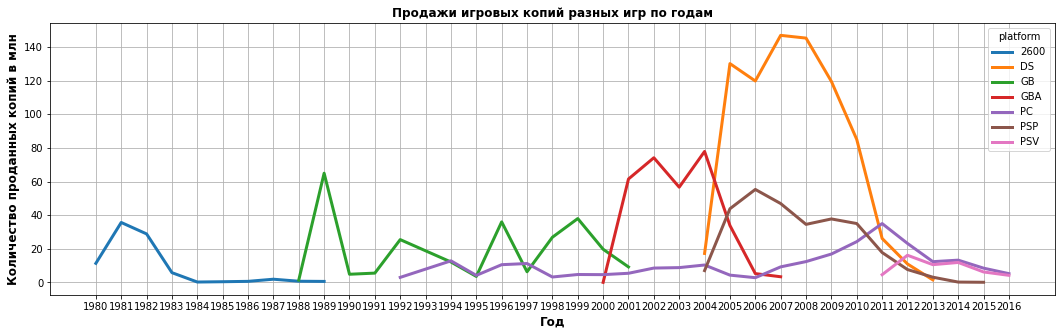

In [53]:
ps = ['X360', 'XB', 'XOne', 'PS', 'PS2', 'PS3', 'PS4', 'N64', 'NES', 'SNES', 'Wii', '3DS', 'WiiU', 'GC']
other = []         # Зная заранее что получится вот такой список я бы подготовил отдельные пременные
for i in musthave: # но сейчас не стану это переделывать))
    if i not in ps:      # Заполняем список не вошедшими в прошлые графики платформы, 
        other.append(i)  # в случае если изменим минимальное количество продаж платформеров то
                         # сюда автоматом попадут и другие платформы.
        
data6 = data2[data['platform'].isin(other)]
plot = data6.pivot_table(index='year_of_release', columns = 'platform', values='sum_sales', 
                  aggfunc='sum').plot(grid=True, figsize=(18, 5), linewidth=3)

plot.set_xlabel('Год', fontsize='12', fontweight='bold')
plot.set_ylabel('Количество проданных копий в млн', fontsize='12', fontweight='bold')
plot.set_title('Продажи игровых копий разных игр по годам', fontsize='12', fontweight='bold')
plot.set_xticks(np.arange(1980,2017,1))

plt.show()

**В сухом остатке имеем Atari2600, портативные игровые консоли а также радость всех ПК бояр, его святейшество PC.**\
**Начало 80х годов рынок находится под монополией Atari2600.\
К концу 80х на рынок ошеломляюще залетает портативная консоль GameBoy от Nintendo.  
В начале 90х свой кусок от рынка игр начинает отъедать PC. \
В 2000 году Nintendo повторяет свой успех достигнув новых высот продаж платформеров посредством выпуска GameBoyAdvanced.\
В 2004 году Nintendo снова увеличивает рекорды продаж своей новой портативной консолью Nintendo DS. \
В свою очередь Playstation выпускает PSP, попытка выпустить свою портативную консоль но сравниться с Nintendo ей не удаётся. \
PC же всё это время имеет стабильный кусок рынка, внезапно возрастающий к 10-12 году вероятно влияние игровых платформ типа Steam. \
Неизвестно что было бы дальше но ближе к 2014 всех постигает одна участь на всех - приход мобильных игр.**

**К сожалению в выборку не попадает Sega но у её платформеров какое-то слишком низкое количество продаж, как не уменьшаю млн продаж её нет и нет, поэтому принято решение отнести сегу в категорию 'карликовых' игровых платформ и не разбирать её влияние на рынок игр в данных графиках.\
Также обусловить отсутствие сеги на рынке можно тем что к примеру в России она имела большую распространённость за счёт дешевизны, а низкие продажи самих игр можно объяснить чёрным рынком.**

### За какой характерный срок появляются новые и исчезают старые платформы?

**Не совсем верно указывать какой-то срок относительно всех платформ.\
Появление новой платформы от одной и той же компании явно происходило на фоне упадка популярности предыдущей, и чем ближе к 2016 году тем быстрее проходил этот срок.\
Платформы в среднем находились на пике по 3-4 года.\
А в целом цикл жизни одной платформы достигал около 10 лет.**

### Актуальный период.

**Актуальным периодом будем считать последними 4 года, так будет видно взлёт и падение любой новой платформы.**

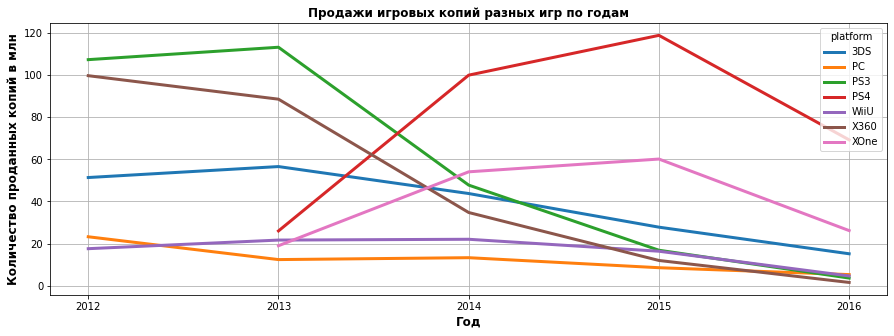

In [54]:
ps = ['PSP', 'Wii', 'PSV', 'DS']
other = []         
for i in musthave: 
    if i not in ps:      
        other.append(i)  

data_year = data2[data['platform'].isin(other)]
data_year = data_year[data2['year_of_release'] > 2011]

plot = data_year.pivot_table(index='year_of_release', columns = 'platform', values='sum_sales', # Рисуем график.
                  aggfunc='sum').plot(grid=True, figsize=(15, 5), linewidth=3)

plot.set_xlabel('Год', fontsize='12', fontweight='bold')                                
plot.set_ylabel('Количество проданных копий в млн', fontsize='12', fontweight='bold')
plot.set_title('Продажи игровых копий разных игр по годам', fontsize='12', fontweight='bold')
plot.set_xticks(np.arange(2012,2017,1))    
plt.show()

#### Какие платформы лидируют по продажам, растут или падают?

**До 2015 растут две платформы PS4, XOne, далее они показывают спад, он может быть временным и в 2017 продажи могут даже вырасти, зависит от выхода новых игр, но как показывает время, платформы после 3-4 лет своего существования имеют тенденцую на полную убыль.\
Все остальные платформы испытывают падение в несколько лет, после которого уже наврятли поднимутся. \
PC стабильно держится с небольшим куском рынка.**

### Ящик с усами по глобальным продажам игр в разбивке по платформам.

In [55]:
top5 = data[data['year_of_release'] > 2011]
top5 = top5.groupby(['platform'])['sum_sales'].sum().sort_values(ascending=False)
top5.head(5)

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
Name: sum_sales, dtype: float64

In [56]:
box = data[data['year_of_release'] > 2011]
box = box[box['platform'].isin(['PS4', 'PS3', 'X360', '3DS', 'XOne'])]
box.groupby('platform')['sum_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,396.0,0.491439,1.387161,0.01,0.04,0.11,0.3125,14.60
PS3,493.0,0.585781,1.462855,0.01,0.05,0.20,0.6100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.06,0.20,0.7300,14.63
X360,292.0,0.810068,1.712069,0.01,0.10,0.31,0.8700,16.27
XOne,247.0,0.645020,1.036139,0.01,0.06,0.22,0.6850,7.39


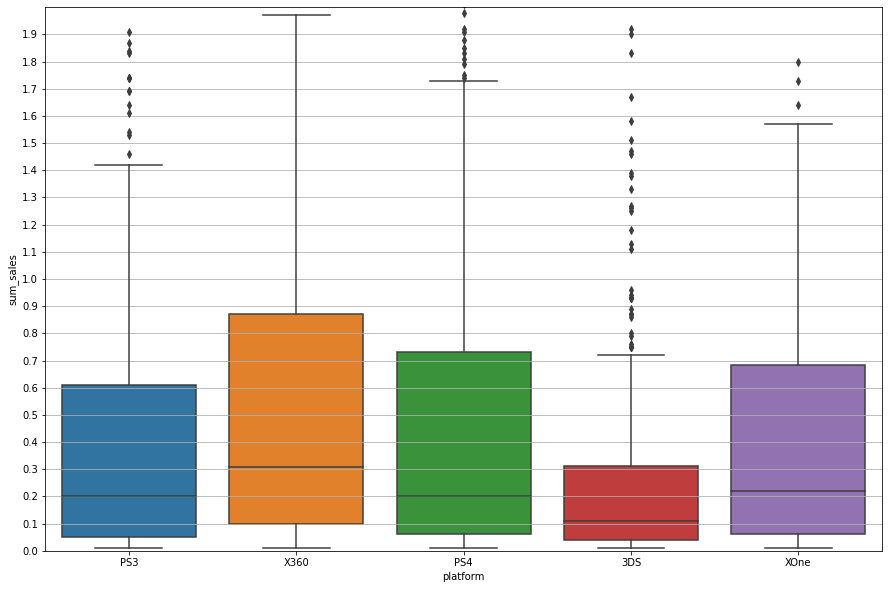

In [57]:
plt.figure(figsize=(15,10))
plt.ylim(0, 2)
plt.yticks(np.arange(0, 2, 0.1))
plt.grid(True)
sns.boxplot(y='sum_sales', x='platform', data=box)
print()

**В диаграмме размаха наблюдаются большие выбросы, результат продаж некоторых популярных игр.\
Медианны топ платформ находятся ниже среднего, и находятся между первым и вторым квартилем.\
В целом диаграммы размаха у платформ схожи медианны в районе 0.2-0.25млн продаж,\
выделяется только Nintendo 3DS, значительно ниже 3 квартиль, в районе 30млн продаж, и медианна в районе 0.1млн продаж.**

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

#### Оценки пользователей.

Коррелияция = PS4 -0.031957110204556376


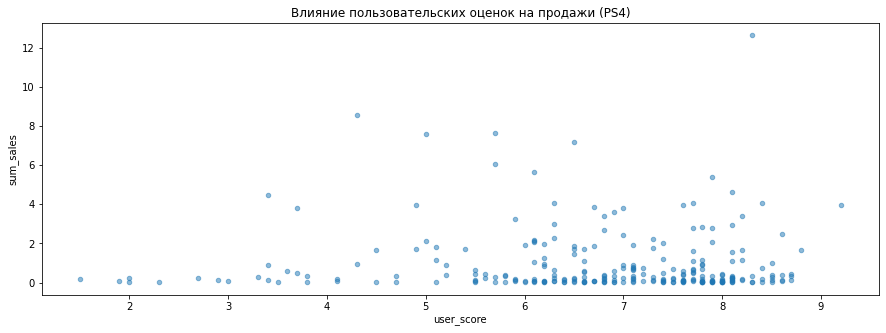

In [58]:
act_data = data[data['year_of_release'] > 2011]
ps4 = act_data[act_data['platform'] == 'PS4']
ps4.plot(title='Влияние пользовательских оценок на продажи (PS4)', 
           x='user_score', y='sum_sales', kind='scatter', figsize=(15,5), alpha=0.5)

print('Коррелияция = PS4', ps4['user_score'].corr(ps4['sum_sales']))

**Оценки от пользователей почти не влияли на продажи. \
Корреляция от оценок пользователей слабая.**

#### Оценки критиков.

Коррелияция PS4 = 0.4065679020617811


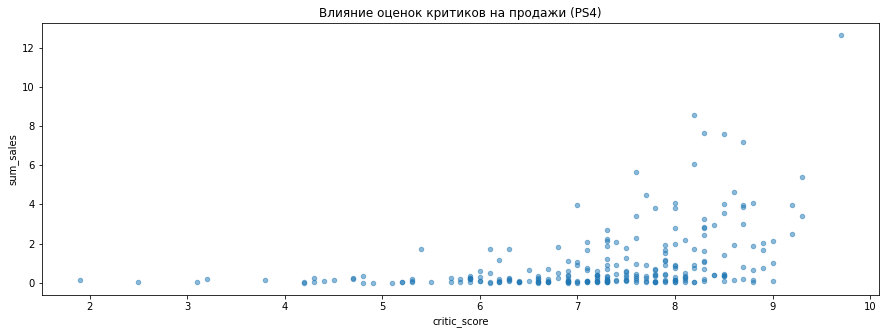

In [59]:
ps4.plot(title='Влияние оценок критиков на продажи (PS4)', 
           x='critic_score', y='sum_sales', kind='scatter', figsize=(15,5), alpha=0.5)

print('Коррелияция PS4 =', ps4['critic_score'].corr(ps4['sum_sales']))

**Оценки от критиков имеют чуть больше влияние но всё ещё слабо влияют на продажи, корреляция слабая.**

#### Вывод:

**Оценки от пользователей и критиков в целом оказывают слабое влияние на продажи.**

### Соотнешение выводов с продажами игр на других платформах.

#### Оценки пользователей.

Коррелияция = 3DS, XOne, PS3, X360 = 0.00868021109856178


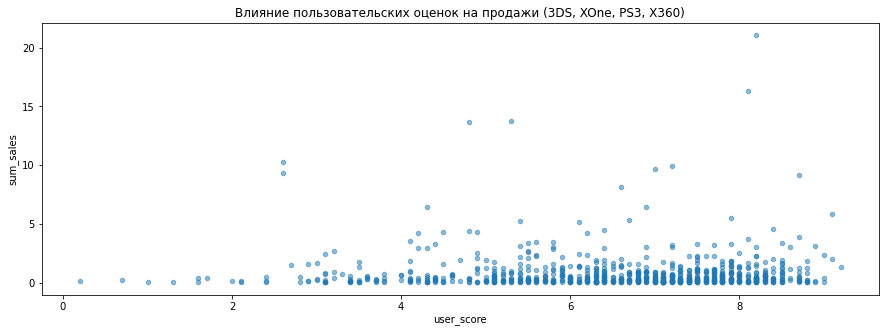

In [60]:
top = ['3DS', 'XOne', 'PS3', 'X360']
act_data = data[data['year_of_release'] > 2011]
top = act_data[act_data['platform'].isin(top)]
top.plot(title='Влияние пользовательских оценок на продажи (3DS, XOne, PS3, X360)', 
           x='user_score', y='sum_sales', kind='scatter', figsize=(15,5), alpha=0.5)

print('Коррелияция = 3DS, XOne, PS3, X360 =', top['user_score'].corr(top['sum_sales']))

**Оценки пользователей не коррелируют.**

#### Оценки критиков.

Коррелияция = 3DS, XOne, PS3, X360 = 0.3396841543084411


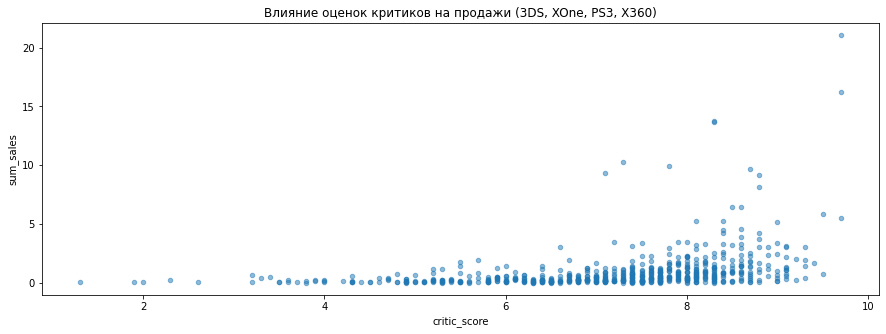

In [61]:
top = ['3DS', 'XOne', 'PS3', 'X360']
act_data = data[data['year_of_release'] > 2011]
top = act_data[act_data['platform'].isin(top)]
top.plot(title='Влияние оценок критиков на продажи (3DS, XOne, PS3, X360)', 
           x='critic_score', y='sum_sales', kind='scatter', figsize=(15,5), alpha=0.5)

print('Коррелияция = 3DS, XOne, PS3, X360 =', top['critic_score'].corr(top['sum_sales']))

**В сравнении с PS4 другие платформы слабо коррелируют относительно оценок критиков.**

**В целом можно сказать что оценки пользователей не оказывают воздействия на продажи.\
Оценки критиков имеют очень слабое положительное влияние - чем выше оценки тем больше продажи.**

### Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

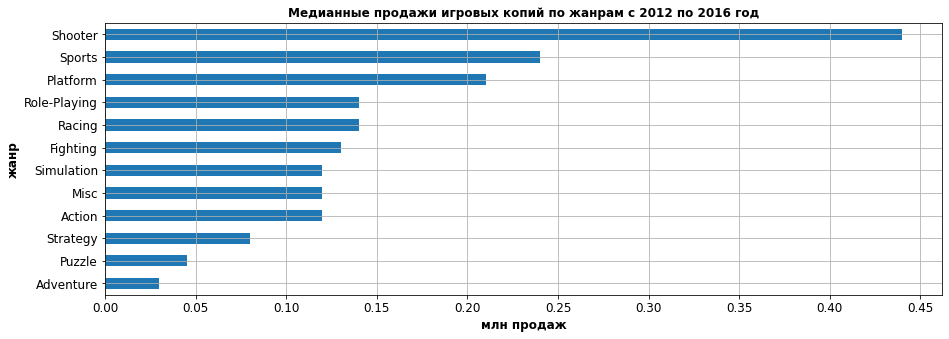

In [62]:
sales = data[data['year_of_release'] > 2011]
sales = sales.groupby('genre')['sum_sales'].median().sort_values()
sales = sales.plot(x='genre', y='sum_sales', figsize=(15, 5), kind='barh',
                     xlabel='', grid=True, fontsize='12')
sales.set_xlabel('млн продаж', fontsize='12', fontweight='bold')                                
sales.set_ylabel('жанр', fontsize='12', fontweight='bold')
sales.set_title('Медианные продажи игровых копий по жанрам с 2012 по 2016 год', fontsize='12', fontweight='bold')
sales.set_xticks(np.arange(0, 0.5, 0.05))
print()

**Самым прибыльный жанр Shooter, с медианной продаж копий почти в 450 тысяч.\
На втором и третьем месте жанры Sports и Platform.\
Наименьшее количство продаж у жанов Puzzle, Adventure**

## Портрет пользователя каждого региона

### Самые популярные платформы (топ-5). Различия в долях продаж.

#### Северная Америка (NA)

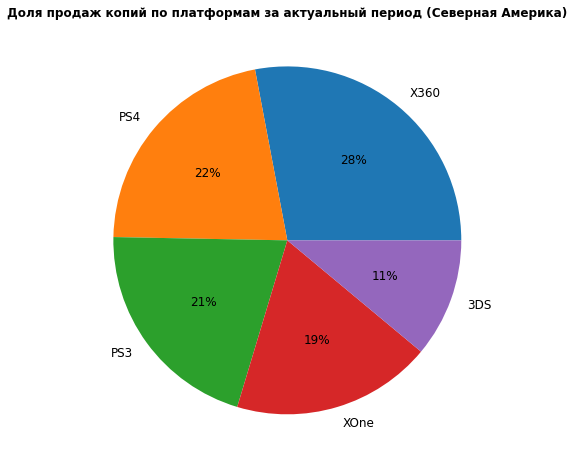

In [63]:
na = data[data['year_of_release'] > 2011]
na = na.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
na = na.plot(x='platform', y='na_sales', figsize=(8, 8), kind='pie',
                     xlabel='', grid=True, fontsize='12', autopct='%1.0f%%', ylabel='')

na.set_title('Доля продаж копий по платформам за актуальный период (Северная Америка)', fontsize='12', fontweight='bold')
print()

**В северной америке самой популярной платформой является X360 с 28% рынка, за ней идут PS4, PS3, XOne с примерно 20% рынка каждая, на последнем месте 3DS с всего 11% рынка.**

#### Европа (EU)

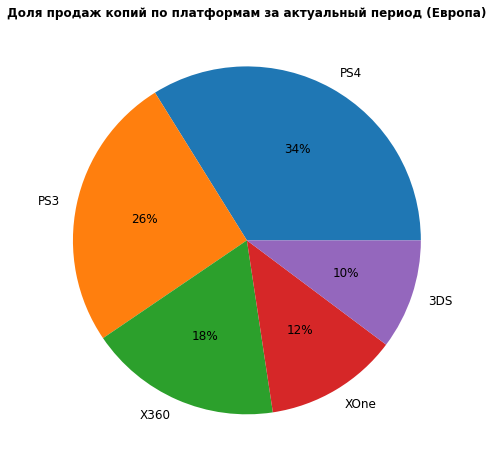

In [64]:
eu = data[data['year_of_release'] > 2011]
eu = eu.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
eu = eu.plot(x='platform', y='eu_sales', figsize=(8, 8), kind='pie',
                     xlabel='', grid=True, fontsize='12', autopct='%1.0f%%', ylabel='')

eu.set_title('Доля продаж копий по платформам за актуальный период (Европа)', fontsize='12', fontweight='bold')
print()

**В Европе лидером продаж является PS4 с 34% рынка, PS3 26%.\
На втором и третьем месте X360 и XOne с 18 и 12% рынка, на последнем месте 3DS c 10% рынка.**

#### Япония (JP)

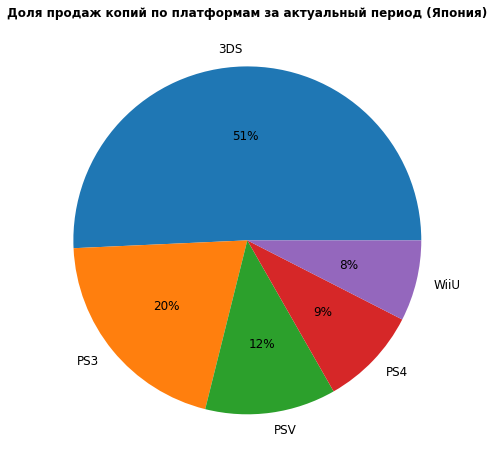

In [65]:
jp = data[data['year_of_release'] > 2011]
jp = jp.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
jp = jp.plot(x='platform', y='jp_sales', figsize=(8, 8), kind='pie',
                     xlabel='', grid=True, fontsize='12', autopct='%1.0f%%', ylabel='')

jp.set_title('Доля продаж копий по платформам за актуальный период (Япония)', fontsize='12', fontweight='bold')
print()

**Япония сильно отличается предпочтениями чуть более половины рынка Nintendo 3DS с 51% рынка.\
На втором месте PS3 всего с 20% рынка.\
Дадее с малыми долями в районе 10% идут PSV, PS4, WiiU.**

**В целом всё выглядит следующим образом.\
В Северной Америке за рынок ведут борьбу за первые места XBox360, PS4 и PS3.\
В Европе на превых местах PlayStation4 и PlayStation3\
А вот в Японии уже на первый план сильно выходит Nintendo 3DS с чуть более половиной рынка, на втором месте с большим отставанием PS3.**

### Самые популярные жанры (топ-5).

#### Северная Америка (NA)

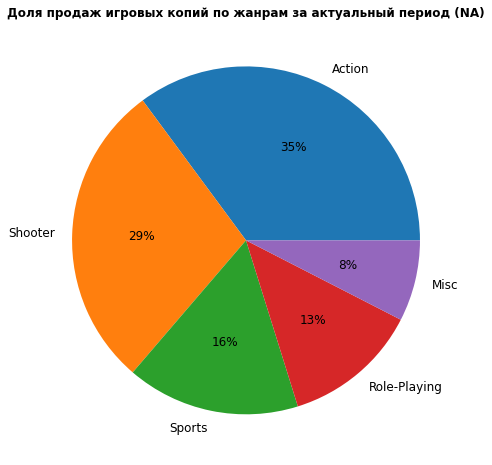

In [66]:
na = data[data['year_of_release'] > 2011]
na = na.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
na = na.plot(x='genre', y='na_sales', figsize=(8, 8), kind='pie',
                     xlabel='', grid=True, fontsize='12', autopct='%1.0f%%', ylabel='')

na.set_title('Доля продаж игровых копий по жанрам за актуальный период (NA)', fontsize='12', fontweight='bold')
print()

**В северной америке на первый план выходят игры с жанром Action с 35% продаж.\
Далее идут шутеры с 29% рынка.\
В меньшей степени пользователи NA интересуются жанрами Sports, RPG, Misc с 16%, 13, 8% рынка соответственно.**

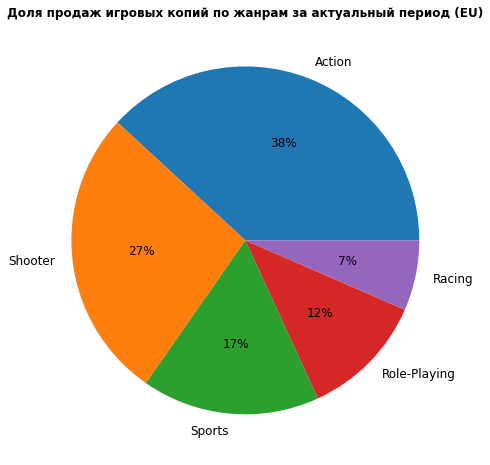

In [67]:
eu = data[data['year_of_release'] > 2011]
eu = eu.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
eu = eu.plot(x='genre', y='eu_sales', figsize=(8, 8), kind='pie',
                     xlabel='', grid=True, fontsize='12', autopct='%1.0f%%', ylabel='')

eu.set_title('Доля продаж игровых копий по жанрам за актуальный период (EU)', fontsize='12', fontweight='bold')
print()

**В Европе на первом плане жанр Action с 38% продаж.\
Далее идут шутеры с 27% рынка.\
Жанр Sports - 17%, RPG 12%, Racing 7% рынка.**

#### Япония (JP)

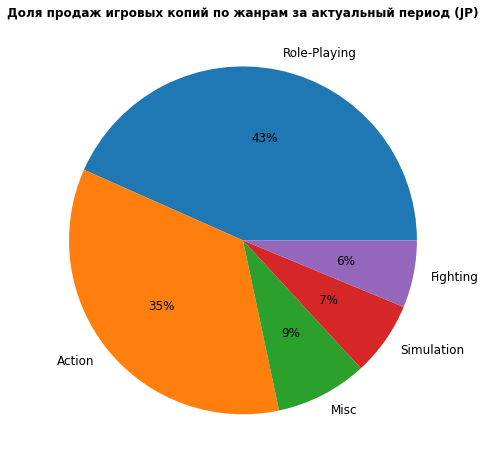

In [68]:
jp = data[data['year_of_release'] > 2011]
jp = jp.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
jp = jp.plot(x='genre', y='jp_sales', figsize=(8, 8), kind='pie',
                     xlabel='', grid=True, fontsize='12', autopct='%1.0f%%', ylabel='')

jp.set_title('Доля продаж игровых копий по жанрам за актуальный период (JP)', fontsize='12', fontweight='bold')
print()

**Япония очень сильно отличается, на первом месте жанр RPG с 43% продаж!\
На втором месте жанр Action с 35% рынка.\
Очень малые доли приходятся на следующие жанры Misc 9%, Simulation 7%, Fighting 6%.**

**В целом можно сказать что Северная Америка и Европа практически одинаковы относительно отдаваемых предпрочтений жанрам,\
с одним небольшим отличием в виде того что на 5 месте в Северной Америке жанр Racing а в Европе Misc.\
Япония отличается, на первом месте RPG, второе место как и в NA и EU, Action**

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

#### Северная Америка.

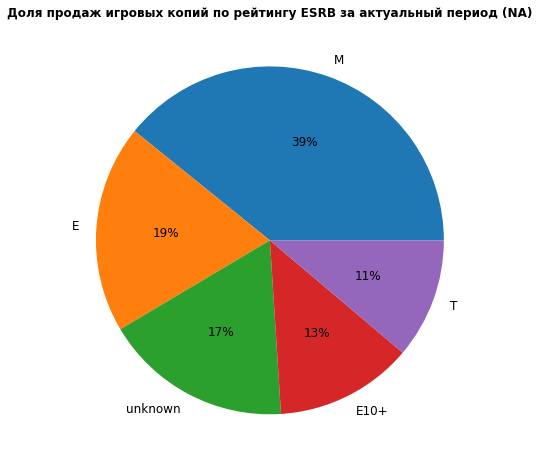

In [69]:
na = data[data['year_of_release'] > 2011]

na = na[data['rating'] != 'AO']
na = na[data['rating'] != 'EC']

na = na.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
na = na.plot(x='rating', y='na_sales', figsize=(8, 8), kind='pie',
                     xlabel='', grid=True, fontsize='12', autopct='%1.0f%%', ylabel='')

na.set_title('Доля продаж игровых копий по рейтингу ESRB за актуальный период (NA)', fontsize='12', fontweight='bold')
print()

**На первом месте в NA игры с рейтингом Mature(старше 17 лет) c 39% продаж.\
На втором месте Everyone(для всех от 6 лет) 19%.\
На третьем месте игры без указания рейтинга 17% рынка.\
Четвертое и пятое место E10+ 13% и Teen(для подростков) 11%.**

#### Европа.

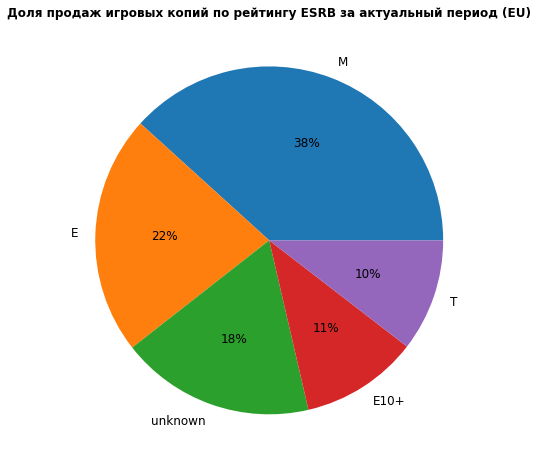

In [70]:
eu = data[data['year_of_release'] > 2011]

eu = eu[data['rating'] != 'AO']
eu = eu[data['rating'] != 'EC']

eu = eu.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
eu = eu.plot(x='rating', y='eu_sales', figsize=(8, 8), kind='pie',
                     xlabel='', grid=True, fontsize='12', autopct='%1.0f%%', ylabel='')

eu.set_title('Доля продаж игровых копий по рейтингу ESRB за актуальный период (EU)', fontsize='12', fontweight='bold')
print()

**В целом Европа не отличается, незначительные изменения в процентах.**

#### Япония.

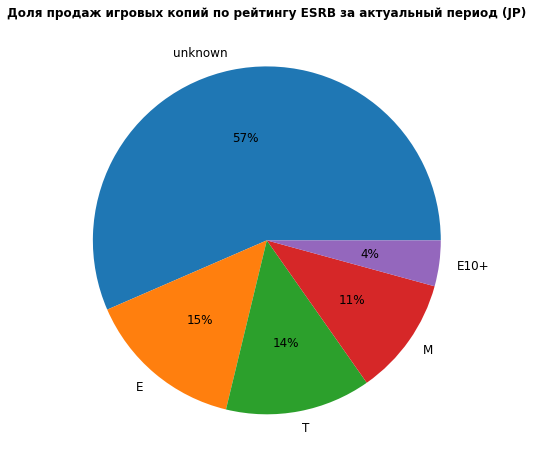

In [71]:
jp = data[data['year_of_release'] > 2011]

jp = jp[data['rating'] != 'AO']
jp = jp[data['rating'] != 'EC']

jp = jp.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)          
jp = jp.plot(x='rating', y='jp_sales', figsize=(8, 8), kind='pie',                
                     xlabel='', grid=True, fontsize='12', autopct='%1.0f%%', ylabel='')

jp.set_title('Доля продаж игровых копий по рейтингу ESRB за актуальный период (JP)', fontsize='12', fontweight='bold')
print()

**Япония как стало обычным сильно выделяется на фоне NA и EU, на первом месте игры без указания рейтинга,
это обусловлено тем что рейтинг ESRB предназначен для маркировки игр для США и Канады, но так-как предпочтения японцев лежат вокруг платформ Японского производителя соответственно и их основная масса игр не маркирована рейтингом ESRB.\
В общем таких игр проданно 57% от всех!\
Далее идут рейтинги E и T с 15-14% рынка, M с 11%, и почти незначительную долю рынка занимает E10+ 4%**

**В целом можно сказать что Европа и Северная Америка очень схожи, Япония очень сильно выделяется, на их фоне, в особенности массовости игр с неопределенным рейтингом от ESRB.**

## Гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Гипотеза h0 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые,\
Гипотеза h1 Средние пользовательские рейтинги платформ Xbox One и PC разные.**

In [72]:
xbox = act_data[act_data['platform'] == 'XOne']['user_score'].mean()
pc = act_data[act_data['platform'] == 'PC']['user_score'].mean()
print('Средние пользовательские оценки XOne =', round(xbox, 3))
print('Средние пользовательские оценки PC =', round(pc, 3))

Средние пользовательские оценки XOne = 6.521
Средние пользовательские оценки PC = 6.429


In [73]:
xbox = act_data[act_data['platform'] == 'XOne']
xbox = xbox[xbox['user_score'].notnull()] # Подготавливаю данные.

pc = act_data[act_data['platform'] == 'PC']
pc = pc[pc['user_score'].notnull()]

print(len(xbox['user_score'])) # Выясняю длину списков для дальнейшего сравнения.
print(len(pc['user_score']))

182
206


In [74]:
alpha = 0.05
results = st.ttest_rel(pc['user_score'].sample(n=182), xbox['user_score'], alternative='two-sided')

print('pvalue', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу в пользу альтернативной")
else:
    print("Опровергнуть нулевую гипотезу нельзя")

pvalue 0.318309467225234
Опровергнуть нулевую гипотезу нельзя


**P-значение, основанного на результате двустороннего t-теста парных выборок больше установленного уровня значимости alpha равному 0.05%, что отвергает гипотезу h1.\
Средние пользовательские оценки XOne и PC не разные.**

### Средние пользовательские рейтинги жанров Action и Sports разные.

**Гипотеза h0 - Средние пользовательские рейтинги жанров Action и Sports разные.\
Гипотеза h1 - Средние пользовательские рейтинги жанров Action и Sports одинаковые.**

In [75]:
action = act_data[act_data['genre'] == 'Action']['user_score'].mean()
sports = act_data[act_data['genre'] == 'Sports']['user_score'].mean()
print('Средние пользовательские оценки жанра Action =', round(action, 3))
print('Средние пользовательские оценки жанра Sports =', round(sports, 3))

Средние пользовательские оценки жанра Action = 6.825
Средние пользовательские оценки жанра Sports = 5.456


In [76]:
action = act_data[act_data['genre'] == 'Action']
action = action[action['user_score'].notnull()]

Sports = act_data[act_data['genre'] == 'Sports']
Sports = Sports[Sports['user_score'].notnull()]

print(len(action['user_score']))
print(len(Sports['user_score']))

523
195


In [77]:
alpha = 0.05
results = st.ttest_rel(action['user_score'].sample(n=195), Sports['user_score'], alternative='two-sided')

print('pvalue', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу в пользу альтернативной")
else:
    print("Опровергнуть нулевую гипотезу нельзя")

pvalue 1.210883025433986e-14
Отвергаем нулевую гипотезу в пользу альтернативной


**P-значение, основанного на результате двустороннего t-теста парных выборок меньше установленного уровня значимости alpha равному 0.05%, что в свою очередь опровергает гипотезу h0.\
Средние пользовательские оценки Action и Sports не разные.**

**В целом можно сказать что оценки игр по проверенным платформам и жанрам относительно актуального периода одинаковые.**

### Пояснение формулировок гипотез и значения alpha.

**Гипотезы формулировались на основе предположении о некоем исходном положении вещей, названными нами нулевой гипотезой,\
далее выдвигалась альтернативная гипотеза, противоречащая нулевой.\
\
Alpha уровень выбирался исходя из того что небольшие отклонения не играли бы значительной роли, поэтому был выбран средний уровень в 0.05%**

## Вывод:

### Данные

**Датафрейм включал в себя почти 17 тысяч строк с данными о разных платформ, жанров игр, и их оценок от пользователей и критиков, также имелись данные о возрастном рейтинге игр.**

### Предобработка данных

**Были изменены типы данных некоторых столбцов.\
Изменены названия столбцов на нижний регистр.\
Были сохранены строки с пропусками в rating, critic_score, user_score.**

### Исследовательский анализ данных

#### Платформы с наибольшим количеством продаж по годам.

**Был проведён анализ по истории появления и угасания именитых платформ за период с 1980 по 2016год.\
Было выявленно что одна платформа выпущенная фирмой могла держать марку в районе 4лет, в целом прослеживается\
тенденция при которой чем ближе платформы выходили к 2016 году тем меньше по времени они пользовались популярностью.\
Также со временем наблюдался бум всевозможных платформ от разных фирм что сказывалось в целом на популярностью каждой платформы в отдельности, стоит добавить что количество проданных копий также со временем сильно увеличивалось, и лишь ближе к 2016 году обнаружен гигантский спад интереса к играм, который мы обусловили приходом на рынок мобильных игр.**

#### Диаграмма размаха по продажам игр на разных платформах.

**Диаграмма выявила сильнейшие выбросы, коими являются культовые игры бестселлеры сильно выделяющихся на фоне общей массы игр, в целом это правило верно относительно всех платформ.**

#### Влияение оценок критиков и пользователей на продажи игр.

**Путём метода корреляции было установлено что влияние оценок на продажи игр имеет слабые показатели.**

#### Самые прибыльные жанры.

**В топ-5 самыми прибыльными жанрами входят - Action, с медианной продаж копий почти в 450 тысяч.\
На втором и третьем месте жанры Sports и Platform.\
Наименьшее количство продаж у жанов Puzzle, Adventure**

#### Влияние оценок на продажи.

**Путём высчитывания корреляций Пирсона и построения диаграмм рассеяния было выявлено что:\
Оценки пользователей не оказывают воздействия на продажи.\
Оценки критиков имеют очень слабое положительное влияние - чем выше оценки тем больше продажи.**

### Портрет пользователя каждого региона

**В целом можно сказать что портреты пользователей Северной Америки и Европы имеют мало отличий, Япония же сильно выделяется на их фоне.\
\
Любимые платформы:\
В Северной Америке за рынок ведут борьбу за первые места XBox360, PS4 и PS3.\
В Европе на превых местах PlayStation4 и PlayStation3\
А вот в Японии уже на первый план сильно выходит Nintendo 3DS с чуть более половиной рынка, на втором месте с большим отставанием PS3.\
\
Любимые жанры:\
В целом можно сказать что Северная Америка и Европа практически одинаковы относительно отдаваемых предпрочтений жанрам,\
с одним небольшим отличием в виде того что на 5 месте в Северной Америке жанр Racing а в Европе Misc.\
Япония отличается, на первом месте RPG, второе место как и в NA и EU, Action. Остальные жанры в Японии имеют малую долю рынка.\
\
Рейтинги ESRB:\
В целом можно сказать что Европа и Северная Америка очень схожи, Япония очень сильно выделяется, на их фоне, в особенности массовости игр с неопределенным рейтингом от ESRB.**

### Гипотезы

**На основе двустороннего t-теста были проверенны гипотезы которые выявели:\
Что средние пользовательские рейтинги платформ Xbox One и PC не отличаются.\
А также что средние пользовательские рейтинги жанров Action и Sports не отличаются.**